In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heartClassificationData = pd.read_csv('/content/drive/MyDrive/dataset/heart_disease_classification_dataset.csv')
#print(heartClassificationData)
heartClassificationData.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
heartClassificationData.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [ ]:
heartClassificationDataNew1 = heartClassificationData.dropna(axis=0,subset = ['trestbps','thalach'])
print('After dropping :', heartClassificationDataNew1.shape)

After dropping : (294, 15)


In [ ]:
heartClassificationDataNew1 = heartClassificationDataNew1.drop('Unnamed: 0',axis = 1)

In [ ]:
heartClassificationDataNew1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        1
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(heartClassificationDataNew1[['chol']])

heartClassificationDataNew1['chol'] = impute.transform(heartClassificationDataNew1[['chol']])

In [ ]:
heartClassificationDataNew1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

changing = LabelEncoder()

heartClassificationDataNew1['sex'] = changing.fit_transform(heartClassificationDataNew1['sex'])

print(heartClassificationDataNew1[['sex']].head())

   sex
0    1
1    1
2    0
3    1
5    1


In [ ]:
from sklearn.preprocessing import LabelEncoder

changing = LabelEncoder()

heartClassificationDataNew1['target'] = changing.fit_transform(heartClassificationDataNew1['target'])

print(heartClassificationDataNew1[['target']].head())

   target
0       1
1       1
2       1
3       1
5       1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = heartClassificationDataNew1.drop(columns='target',axis=1)
y = heartClassificationDataNew1['target'] 

In [ ]:
print(y)

0      1
1      1
2      1
3      1
5      1
      ..
296    0
298    0
299    0
300    0
302    0
Name: target, Length: 294, dtype: int64


In [ ]:
print(x)

     age  sex  cp  trestbps   chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3     145.0  233.0  ...      0      2.3      0   0     1
1     37    1   2     130.0  250.0  ...      0      3.5      0   0     2
2     41    0   1     130.0  204.0  ...      0      1.4      2   0     2
3     56    1   1     120.0  236.0  ...      0      0.8      2   0     2
5     57    1   0     140.0  192.0  ...      0      0.4      1   0     1
..   ...  ...  ..       ...    ...  ...    ...      ...    ...  ..   ...
296   63    0   0     124.0  197.0  ...      1      0.0      1   0     2
298   57    0   0     140.0  241.0  ...      1      0.2      1   0     3
299   45    1   3     110.0  264.0  ...      0      1.2      1   0     3
300   68    1   0     144.0  193.0  ...      0      3.4      1   2     3
302   57    0   1     130.0  236.0  ...      0      0.0      1   1     2

[294 rows x 13 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(235, 13)
(59, 13)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalingDataset = MinMaxScaler()

scalingDataset.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train_scaled = scalingDataset.transform(X_train)

In [ ]:
X_test_scaled = scalingDataset.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
logicRegInstance = LinearRegression()
logicRegInstance.fit(X_train, y_train)
y_prediction = logicRegInstance.predict(X_test)
y_prediction

array([ 0.42411191,  0.20684489,  0.62403135,  0.84142128,  0.62130536,
        0.67100197,  0.66755386,  0.37945297,  0.65321788,  0.63404593,
        0.31650924,  0.59504564,  0.38292886,  0.84252971,  0.01849821,
        0.48574183,  0.63476703,  0.62625609,  0.51689867,  0.17022417,
        0.68857216,  1.1494282 ,  0.23408389,  0.7427308 ,  0.26917844,
        0.20137913,  0.63146178,  0.59096841,  1.03139095,  0.52383892,
        0.81881171,  0.26679686,  0.17912639,  0.80054956,  0.13876684,
        0.88697774,  0.56551098,  1.31577288,  0.21874484,  0.66590488,
        0.96048686,  1.14434689,  0.53672799,  0.61053644,  1.03829907,
        1.06635268,  0.63146178,  0.5950644 , -0.18279373,  0.75935745,
        1.00284418,  0.47074744,  0.20871271,  0.03381604, -0.16737866,
        0.21263499,  0.74741232,  0.86321477,  0.63675551])

In [ ]:
# Import the dependencies for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Train the model
heartClassificationData_model = LogisticRegression()
heartClassificationData_model.fit(X_train, y_train) #Training the model
prediction = heartClassificationData_model.predict(X_test)
print(prediction)# printing predictions

[0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logisticRegInstance_score = accuracy_score(y_test, predictions)

In [ ]:
print(logisticRegInstance_score)

0.7966101694915254


In [ ]:
print( accuracy_score(y_test, predictions))

0.7966101694915254


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#animal = pd.read_csv("zoo.csv")
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
logicRegInstance = DecisionTreeClassifier(criterion='entropy',random_state=1)
logicRegInstance.fit(X_train,y_train)
y_prediction = logicRegInstance.predict(X_test)
decisionTree_score=accuracy_score(y_prediction,y_test)
print(decisionTree_score)

0.7627118644067796


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = ['logisticRegInstance_score','decisionTree_score']
y = [logisticRegInstance_score,decisionTree_score]

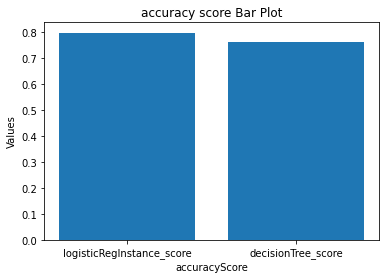

In [ ]:
# Simple Bar Plot
plt.bar(x,y)
plt.xlabel('accuracyScore')
plt.ylabel("Values")
plt.title('accuracy score Bar Plot')
plt.show()